# CMIコンペ ベースライン前処理

## Step1: 必要なライブラリのインポートとデータ読み込み

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# 日本語フォント設定
plt.rcParams['font.family'] = 'DejaVu Sans'

print("ライブラリ読み込み完了")

ライブラリ読み込み完了


In [15]:
# データ読み込み
train = pd.read_csv('../data/train.csv')
demographics = pd.read_csv('../data/train_demographics.csv')
test = pd.read_csv('../data/test.csv')
test_demographics = pd.read_csv('../data/test_demographics.csv')

print(f"Train shape: {train.shape}")
print(f"Demographics shape: {demographics.shape}")
print(f"Test shape: {test.shape}")
print(f"Test demographics shape: {test_demographics.shape}")

# 先頭表示
print("\n=== Train Data ===")
display(train.head())
print("\n=== Demographics Data ===")
display(demographics.head())

Train shape: (574945, 341)
Demographics shape: (81, 8)
Test shape: (107, 336)
Test demographics shape: (2, 8)

=== Train Data ===


,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,112.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,101.0,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,101.0,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0



=== Demographics Data ===


,subject,adult_child,age,sex,handedness,height_cm,shoulder_to_wrist_cm,elbow_to_wrist_cm
0,SUBJ_000206,1,41,1,1,172.0,50,25.0
1,SUBJ_001430,0,11,0,1,167.0,51,27.0
2,SUBJ_002923,1,28,1,0,164.0,54,26.0
3,SUBJ_003328,1,33,1,1,171.0,52,25.0
4,SUBJ_004117,0,15,0,1,184.0,54,28.0


## Step2: データの基本情報確認

In [16]:
# カラム情報確認
print("=== Train Data Columns ===")
print(f"Total columns: {len(train.columns)}")
print("\nFirst 10 columns:", train.columns[:10].tolist())
print("\nLast 10 columns:", train.columns[-10:].tolist())

# センサーカラムの特定
# センサーカラムの詳細確認
acc_cols = [col for col in train.columns if 'acc_' in col]
gyr_cols = [col for col in train.columns if 'gyr_' in col]
tof_cols = [col for col in train.columns if 'tof_' in col]
thm_cols = [col for col in train.columns if 'thm_' in col]
rot_cols = [col for col in train.columns if 'rot_' in col]

print(f"\nAccelerometer columns: {len(acc_cols)}")
print(f"Gyroscope columns: {len(gyr_cols)}")
print(f"ToF sensor columns: {len(tof_cols)}")
print(f"Thermal sensor columns: {len(thm_cols)}")
print(f"Rotation columns: {len(rot_cols)}")

print("\nAccelerometer columns:", acc_cols)
print("\nGyroscope columns:", gyr_cols)
print("\nToF sensor columns (first 10):", tof_cols[:10])
print("\nThermal sensor columns (first 10):", thm_cols[:10])
print("\nRotation columns:", rot_cols)

# センサーカラムの特定
sensor_cols = [col for col in train.columns if any(sensor in col for sensor in ['acc_', 'gyr_', 'tof_', 'thm_', 'rot_'])]
print(f"\nセンサーカラム数: {len(sensor_cols)}")
print("センサーカラム例:", sensor_cols[:10])

# ラベル情報確認
print("\n=== Gesture Labels ===")
print(train['gesture'].value_counts())
print(f"\nユニークなジェスチャー数: {train['gesture'].nunique()}")

# シークエンス情報確認
print("\n=== Sequence Info ===")
print(f"ユニークなシークエンス数: {train['sequence_id'].nunique()}")
print(f"ユニークな被験者数: {train['subject'].nunique()}")
print("\nシークエンス長の分布:")
seq_lengths = train.groupby('sequence_id').size()
print(seq_lengths.describe())

=== Train Data Columns ===
Total columns: 341

First 10 columns: ['row_id', 'sequence_type', 'sequence_id', 'sequence_counter', 'subject', 'orientation', 'behavior', 'phase', 'gesture', 'acc_x']

Last 10 columns: ['tof_5_v54', 'tof_5_v55', 'tof_5_v56', 'tof_5_v57', 'tof_5_v58', 'tof_5_v59', 'tof_5_v60', 'tof_5_v61', 'tof_5_v62', 'tof_5_v63']

Accelerometer columns: 3
Gyroscope columns: 0
ToF sensor columns: 320
Thermal sensor columns: 5
Rotation columns: 4

Accelerometer columns: ['acc_x', 'acc_y', 'acc_z']

Gyroscope columns: []

ToF sensor columns (first 10): ['tof_1_v0', 'tof_1_v1', 'tof_1_v2', 'tof_1_v3', 'tof_1_v4', 'tof_1_v5', 'tof_1_v6', 'tof_1_v7', 'tof_1_v8', 'tof_1_v9']

Thermal sensor columns (first 10): ['thm_1', 'thm_2', 'thm_3', 'thm_4', 'thm_5']

Rotation columns: ['rot_w', 'rot_x', 'rot_y', 'rot_z']

センサーカラム数: 332
センサーカラム例: ['acc_x', 'acc_y', 'acc_z', 'rot_w', 'rot_x', 'rot_y', 'rot_z', 'thm_1', 'thm_2', 'thm_3']

=== Gesture Labels ===
gesture
Text on phone            

## Step3: 利き手情報の結合と分析

In [17]:
# 利き手情報の結合
train_with_handedness = train.merge(demographics[['subject', 'handedness']], on='subject', how='left')
test_with_handedness = test.merge(test_demographics[['subject', 'handedness']], on='subject', how='left')

print("=== Handedness Distribution ===")
print(train_with_handedness['handedness'].value_counts())
print(f"\n欠損値: {train_with_handedness['handedness'].isnull().sum()}")

# 利き手ごとのジェスチャー分布
print("\n=== Gesture Distribution by Handedness ===")
handedness_gesture = pd.crosstab(train_with_handedness['handedness'], train_with_handedness['gesture'])
display(handedness_gesture)

=== Handedness Distribution ===
handedness
1    503593
0     71352
Name: count, dtype: int64

欠損値: 0

=== Gesture Distribution by Handedness ===


gesture,Above ear - pull hair,Cheek - pinch skin,Drink from bottle/cup,Eyebrow - pull hair,Eyelash - pull hair,Feel around in tray and pull out an object,Forehead - pull hairline,Forehead - scratch,Glasses on/off,Neck - pinch skin,Neck - scratch,Pinch knee/leg skin,Pull air toward your face,Scratch knee/leg skin,Text on phone,Wave hello,Write name in air,Write name on leg
handedness,,,,,,,,,,,,,,,,,,
0,5512,5098,1598,5622,5131,1826,5395,5384,1492,5173,6282,1278,3941,1647,6708,3941,3976,1348
1,35048,35026,11495,38683,35087,15288,35407,35539,12050,35334,50337,8566,26802,10681,51754,30415,27291,8790


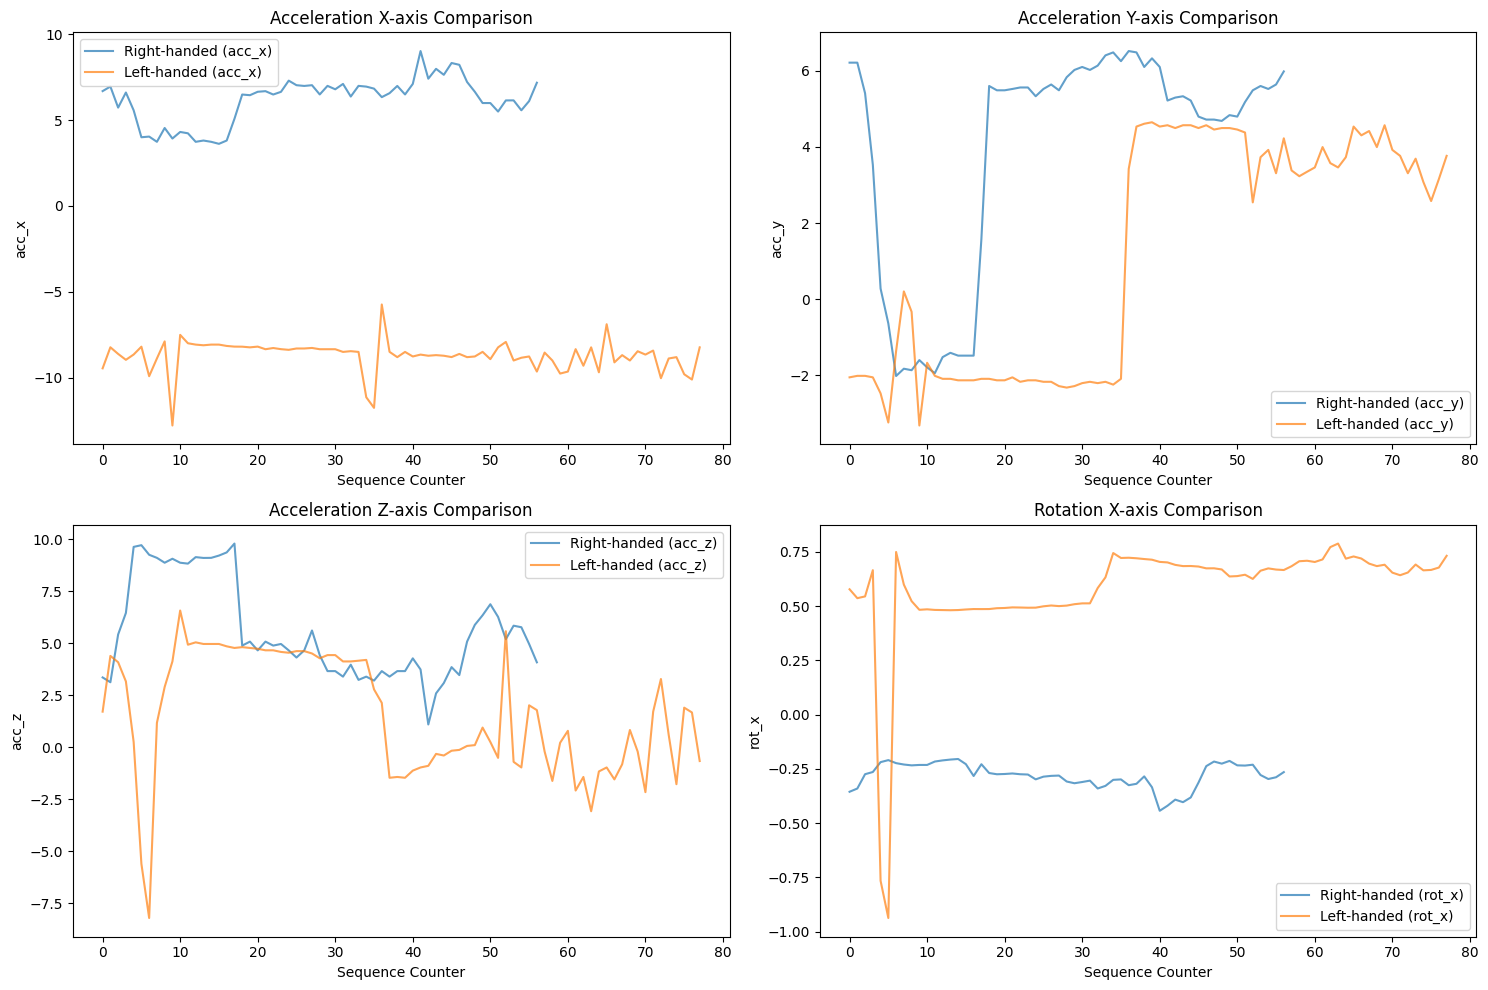

In [18]:
# 利き手ごとのセンサーデータ可視化
plt.figure(figsize=(15, 10))

# サンプルシークエンスを選択
right_handed_seq = train_with_handedness[train_with_handedness['handedness'] == 1]['sequence_id'].unique()[0]
left_handed_seq = train_with_handedness[train_with_handedness['handedness'] == 0]['sequence_id'].unique()[0]

# 加速度データの可視化
plt.subplot(2, 2, 1)
right_data = train_with_handedness[train_with_handedness['sequence_id'] == right_handed_seq]
left_data = train_with_handedness[train_with_handedness['sequence_id'] == left_handed_seq]

plt.plot(right_data['sequence_counter'], right_data['acc_x'], label='Right-handed (acc_x)', alpha=0.7)
plt.plot(left_data['sequence_counter'], left_data['acc_x'], label='Left-handed (acc_x)', alpha=0.7)
plt.title('Acceleration X-axis Comparison')
plt.xlabel('Sequence Counter')
plt.ylabel('acc_x')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(right_data['sequence_counter'], right_data['acc_y'], label='Right-handed (acc_y)', alpha=0.7)
plt.plot(left_data['sequence_counter'], left_data['acc_y'], label='Left-handed (acc_y)', alpha=0.7)
plt.title('Acceleration Y-axis Comparison')
plt.xlabel('Sequence Counter')
plt.ylabel('acc_y')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(right_data['sequence_counter'], right_data['acc_z'], label='Right-handed (acc_z)', alpha=0.7)
plt.plot(left_data['sequence_counter'], left_data['acc_z'], label='Left-handed (acc_z)', alpha=0.7)
plt.title('Acceleration Z-axis Comparison')
plt.xlabel('Sequence Counter')
plt.ylabel('acc_z')
plt.legend()

plt.subplot(2, 2, 4)
# ジャイロスコープカラムが存在しないため、回転データを使用
plt.plot(right_data['sequence_counter'], right_data['rot_x'], label='Right-handed (rot_x)', alpha=0.7)
plt.plot(left_data['sequence_counter'], left_data['rot_x'], label='Left-handed (rot_x)', alpha=0.7)
plt.title('Rotation X-axis Comparison')
plt.xlabel('Sequence Counter')
plt.ylabel('rot_x')
plt.legend()

plt.tight_layout()
plt.show()

## Step4: 利き手補正の実装

In [19]:
def handedness_correction(df):
    """
    利き手に基づいてセンサーデータを補正
    左利きの場合、左右軸を反転
    """
    df = df.copy()
    
    # 左利きの場合の補正
    left_mask = df['handedness'] == 0  # 0: 左利き, 1: 右利き
    
    # 加速度センサーの左右軸反転
    df.loc[left_mask, 'acc_x'] = -df.loc[left_mask, 'acc_x']
    
    # ジャイロスコープの左右軸反転
    # 回転データの左右軸反転（ジャイロスコープの代わり）
    df.loc[left_mask, 'rot_x'] = -df.loc[left_mask, 'rot_x']
    
    # TOFセンサーの左右軸も反転（存在する場合）
    tof_x_cols = [col for col in df.columns if 'tof_' in col and 'x' in col]
    for col in tof_x_cols:
        df.loc[left_mask, col] = -df.loc[left_mask, col]
    
    return df

# 補正実行
train_corrected = handedness_correction(train_with_handedness)
test_corrected = handedness_correction(test_with_handedness)

print("利き手補正完了")
print(f"Train corrected shape: {train_corrected.shape}")
print(f"Test corrected shape: {test_corrected.shape}")

利き手補正完了
Train corrected shape: (574945, 342)
Test corrected shape: (107, 337)


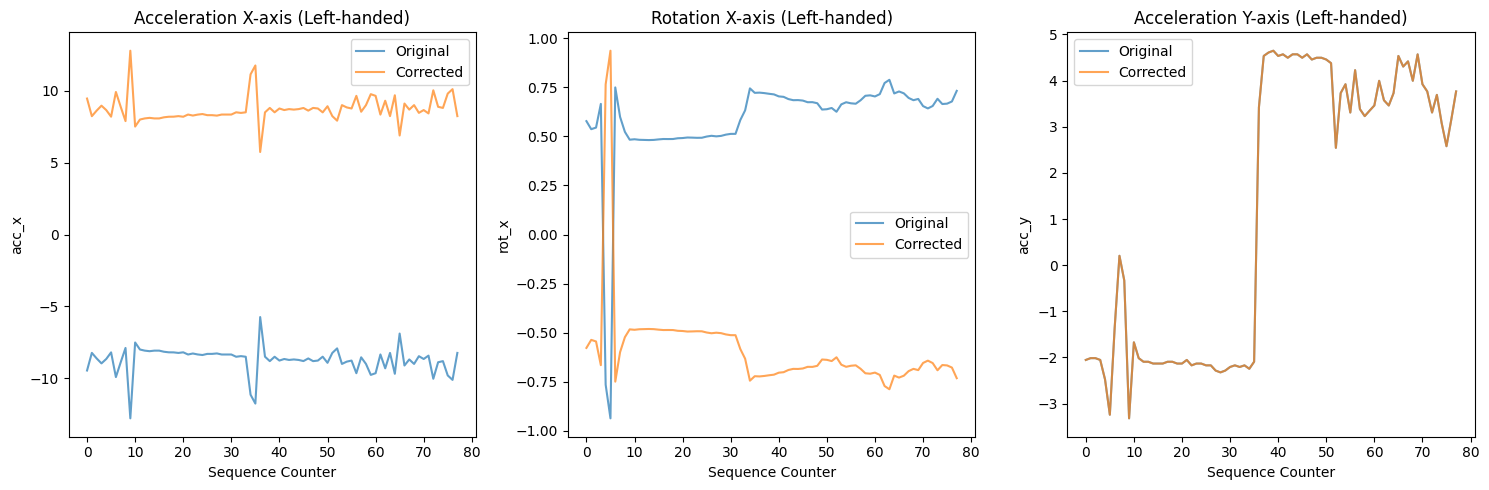

In [20]:
# 補正前後の比較
plt.figure(figsize=(15, 5))

# 左利きのサンプルシークエンス
left_handed_seq = train_with_handedness[train_with_handedness['handedness'] == 0]['sequence_id'].unique()[0]
original_data = train_with_handedness[train_with_handedness['sequence_id'] == left_handed_seq]
corrected_data = train_corrected[train_corrected['sequence_id'] == left_handed_seq]

plt.subplot(1, 3, 1)
plt.plot(original_data['sequence_counter'], original_data['acc_x'], label='Original', alpha=0.7)
plt.plot(corrected_data['sequence_counter'], corrected_data['acc_x'], label='Corrected', alpha=0.7)
plt.title('Acceleration X-axis (Left-handed)')
plt.xlabel('Sequence Counter')
plt.ylabel('acc_x')
plt.legend()

plt.subplot(1, 3, 2)
# ジャイロスコープカラムが存在しないため、回転データを使用
plt.plot(original_data['sequence_counter'], original_data['rot_x'], label='Original', alpha=0.7)
plt.plot(corrected_data['sequence_counter'], corrected_data['rot_x'], label='Corrected', alpha=0.7)
plt.title('Rotation X-axis (Left-handed)')
plt.xlabel('Sequence Counter')
plt.ylabel('rot_x')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(original_data['sequence_counter'], original_data['acc_y'], label='Original', alpha=0.7)
plt.plot(corrected_data['sequence_counter'], corrected_data['acc_y'], label='Corrected', alpha=0.7)
plt.title('Acceleration Y-axis (Left-handed)')
plt.xlabel('Sequence Counter')
plt.ylabel('acc_y')
plt.legend()

plt.tight_layout()
plt.show()

## Step5: 欠損値の確認と処理

=== Missing Values Analysis ===
Train missing values: 3597807
Test missing values: 0

=== Columns with Missing Values (Top 10) ===
thm_5        33286
tof_5_v45    30142
tof_5_v46    30142
tof_5_v47    30142
tof_5_v48    30142
tof_5_v49    30142
tof_5_v50    30142
tof_5_v51    30142
tof_5_v10    30142
tof_5_v53    30142
dtype: int64


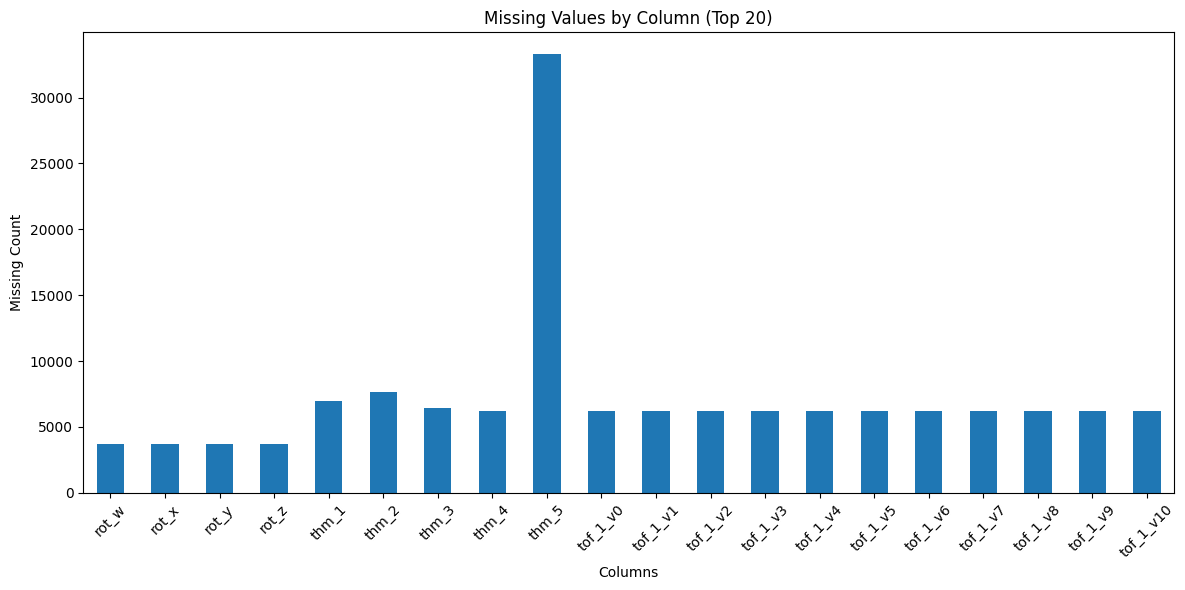

In [21]:
# 欠損値の確認
print("=== Missing Values Analysis ===")
missing_train = train_corrected.isnull().sum()
missing_test = test_corrected.isnull().sum()

print(f"Train missing values: {missing_train.sum()}")
print(f"Test missing values: {missing_test.sum()}")

# 欠損値が多いカラムを確認
print("\n=== Columns with Missing Values (Top 10) ===")
missing_cols = missing_train[missing_train > 0].sort_values(ascending=False)
print(missing_cols.head(10))

# 欠損値の可視化
plt.figure(figsize=(12, 6))
missing_train[missing_train > 0].head(20).plot(kind='bar')
plt.title('Missing Values by Column (Top 20)')
plt.xlabel('Columns')
plt.ylabel('Missing Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# 欠損値の補完
def impute_missing_values(df):
    """
    欠損値を補完する関数
    - センサーデータ: 前方・後方埋め + 0埋め
    - カテゴリカルデータ: 最頻値
    """
    df = df.copy()
    
    # センサーデータのカラムを特定
    sensor_cols = [col for col in df.columns if any(sensor in col for sensor in ['acc_', 'gyr_', 'tof_'])]
    
    # センサーデータの欠損値補完
    for col in sensor_cols:
        if df[col].isnull().sum() > 0:
            # シークエンスごとに前方・後方埋め
            df[col] = df.groupby('sequence_id')[col].fillna(method='ffill')
            df[col] = df.groupby('sequence_id')[col].fillna(method='bfill')
            # 残りの欠損値を0で埋め
            df[col] = df[col].fillna(0)
    
    # カテゴリカルデータの欠損値補完
    categorical_cols = ['handedness', 'gesture', 'behavior', 'orientation', 'phase']
    for col in categorical_cols:
        if col in df.columns and df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].mode()[0])
    
    return df

# 補完実行
train_imputed = impute_missing_values(train_corrected)
test_imputed = impute_missing_values(test_corrected)

print("欠損値補完完了")
print(f"Train missing after imputation: {train_imputed.isnull().sum().sum()}")
print(f"Test missing after imputation: {test_imputed.isnull().sum().sum()}")

欠損値補完完了
Train missing after imputation: 75375
Test missing after imputation: 0


## Step6: センサーデータの標準化

In [23]:
# センサーデータの標準化
def standardize_sensor_data(train_df, test_df):
    """
    センサーデータを標準化する関数
    """
    # センサーデータのカラムを特定
    sensor_cols = [col for col in train_df.columns if any(sensor in col for sensor in ['acc_', 'gyr_', 'tof_'])]
    
    # 標準化器の作成と適用
    scaler = StandardScaler()
    
    # 訓練データでフィットして変換
    train_sensor_data = scaler.fit_transform(train_df[sensor_cols])
    train_df_std = train_df.copy()
    train_df_std[sensor_cols] = train_sensor_data
    
    # テストデータを変換
    test_sensor_data = scaler.transform(test_df[sensor_cols])
    test_df_std = test_df.copy()
    test_df_std[sensor_cols] = test_sensor_data
    
    return train_df_std, test_df_std, scaler

# 標準化実行
train_standardized, test_standardized, scaler = standardize_sensor_data(train_imputed, test_imputed)

print("センサーデータ標準化完了")
print(f"Train standardized shape: {train_standardized.shape}")
print(f"Test standardized shape: {test_standardized.shape}")

センサーデータ標準化完了
Train standardized shape: (574945, 342)
Test standardized shape: (107, 337)


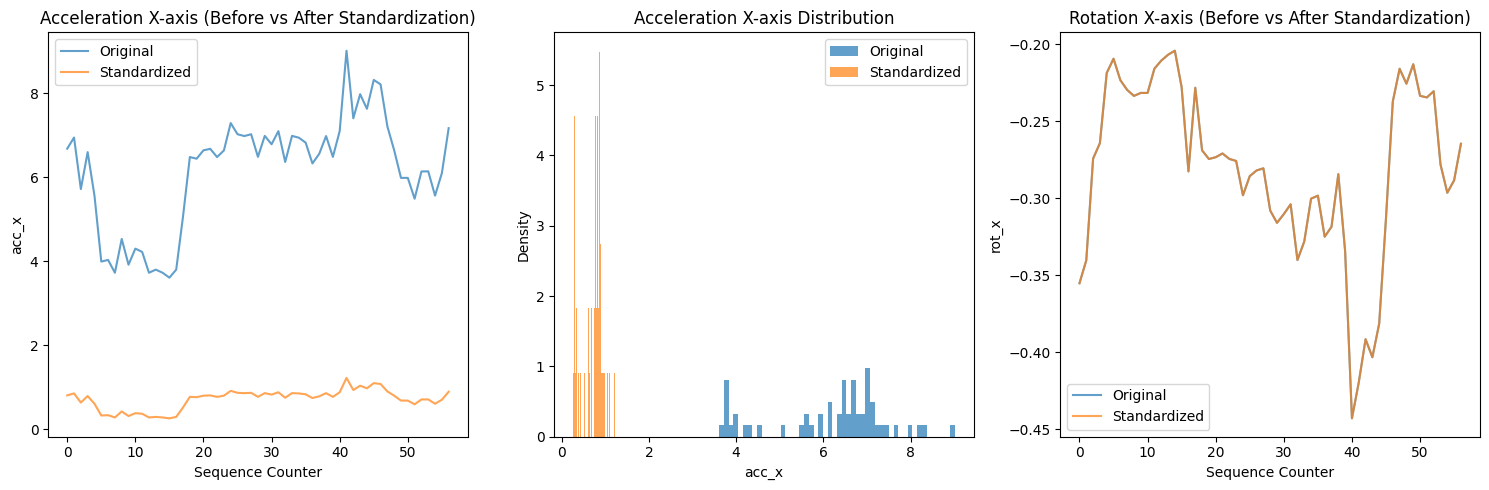

In [24]:
# 標準化前後の比較
plt.figure(figsize=(15, 5))

# サンプルシークエンス
sample_seq = train_imputed['sequence_id'].unique()[0]
original_data = train_imputed[train_imputed['sequence_id'] == sample_seq]
standardized_data = train_standardized[train_standardized['sequence_id'] == sample_seq]

plt.subplot(1, 3, 1)
plt.plot(original_data['sequence_counter'], original_data['acc_x'], label='Original', alpha=0.7)
plt.plot(standardized_data['sequence_counter'], standardized_data['acc_x'], label='Standardized', alpha=0.7)
plt.title('Acceleration X-axis (Before vs After Standardization)')
plt.xlabel('Sequence Counter')
plt.ylabel('acc_x')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(original_data['acc_x'], bins=50, alpha=0.7, label='Original', density=True)
plt.hist(standardized_data['acc_x'], bins=50, alpha=0.7, label='Standardized', density=True)
plt.title('Acceleration X-axis Distribution')
plt.xlabel('acc_x')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 3, 3)
# ジャイロスコープカラムが存在しないため、回転データを使用
plt.plot(original_data['sequence_counter'], original_data['rot_x'], label='Original', alpha=0.7)
plt.plot(standardized_data['sequence_counter'], standardized_data['rot_x'], label='Standardized', alpha=0.7)
plt.title('Rotation X-axis (Before vs After Standardization)')
plt.xlabel('Sequence Counter')
plt.ylabel('rot_x')
plt.legend()

plt.tight_layout()
plt.show()

## Step7: 特徴量抽出（シークエンス単位の統計量）

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 訓練データの読み込み
train = pd.read_csv('../data/train.csv')

# 標準化対象のカラムを選択（センサーデータのみ）
sensor_cols = [col for col in train.columns if any(sensor in col for sensor in ['acc_', 'rot_', 'tof_', 'thm_'])]

# StandardScalerのインスタンスを作成
scaler = StandardScaler()

# センサーデータの標準化
train_standardized = train.copy()
train_standardized[sensor_cols] = scaler.fit_transform(train[sensor_cols])

# 結果の確認
train_standardized.head()
# テストデータの読み込み
test = pd.read_csv('../data/test.csv')

# テストデータの標準化
test_standardized = test.copy()
test_standardized[sensor_cols] = scaler.transform(test[sensor_cols])

# 結果の確認
test_standardized.head()


,row_id,sequence_id,sequence_counter,subject,acc_x,acc_y,acc_z,rot_w,rot_x,rot_y,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000001_000000,SEQ_000001,0,SUBJ_055840,1.279840,0.693656,0.206774,0.030177,-0.596073,-1.047968,...,1.163710,1.124571,2.346528,-0.647992,2.314768,-0.591706,-0.569257,-0.544904,1.432671,-0.511132
1,SEQ_000001_000001,SEQ_000001,1,SUBJ_055840,1.346057,0.333784,-0.107188,-0.028766,-0.831812,-1.091578,...,2.506367,2.434161,-0.676870,-0.647992,-0.613161,-0.591706,-0.569257,2.962672,2.760914,2.719499
2,SEQ_000001_000002,SEQ_000001,2,SUBJ_055840,1.473759,0.058220,-0.559549,0.105072,-0.885437,-1.067525,...,-0.523217,2.471051,-0.676870,-0.647992,-0.613161,-0.591706,-0.569257,-0.544904,2.935683,2.701450
3,SEQ_000001_000003,SEQ_000001,3,SUBJ_055840,1.406867,-0.086978,-0.641564,0.121295,-0.885174,-1.057185,...,-0.523217,2.471051,-0.676870,-0.647992,-0.613161,-0.591706,-0.569257,-0.544904,2.935683,2.809740
4,SEQ_000001_000004,SEQ_000001,4,SUBJ_055840,1.306867,-0.155674,-0.453187,0.099124,-0.889894,-1.065165,...,-0.523217,2.526385,-0.676870,-0.647992,-0.613161,-0.591706,-0.569257,-0.544904,2.988113,2.629258


In [17]:
import pandas as pd
from scipy.stats import kurtosis

def extract_features(df):
    sensor_cols = [col for col in df.columns if any(sensor in col for sensor in ['acc_', 'rot_', 'tof_', 'thm_'])]
    agg_funcs = ['mean', 'std', 'min', 'max', 'median', 'skew']

    # aggで計算できる統計量をまとめる
    features = df.groupby('sequence_id')[sensor_cols].agg(agg_funcs)

    # kurtosisは別途applyで計算
    kurtosis_df = df.groupby('sequence_id')[sensor_cols].apply(
        lambda x: pd.Series({col: kurtosis(x[col], fisher=True, nan_policy='omit') for col in x.columns})
    )
    
    # マルチインデックス解除と列名整理
    features.columns = ['_'.join(col) for col in features.columns]
    features = features.reset_index()

    kurtosis_df = kurtosis_df.reset_index()
    # kurtosisの列名を修正
    for col in sensor_cols:
        kurtosis_df = kurtosis_df.rename(columns={col: f"{col}_kurtosis"})

    # kurtosisをマージ
    features = features.merge(kurtosis_df, on='sequence_id')

    # ラベル結合
    if 'gesture' in df.columns:
        labels = df.groupby('sequence_id')['gesture'].first().reset_index()
        features = features.merge(labels, on='sequence_id')

    return features


In [18]:
# 特徴量抽出の実行
train_features = extract_features(train_standardized)
test_features = extract_features(test_standardized)

# 結果の確認
print(f"Train features shape: {train_features.shape}")
print(f"Test features shape: {test_features.shape}")


/tmp/ipykernel_38932/330342018.py:13: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  lambda x: pd.Series({col: kurtosis(x[col], fisher=True, nan_policy='omit') for col in x.columns})
/tmp/ipykernel_38932/330342018.py:13: SmallSampleWarning: After omitting NaNs, one or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  lambda x: pd.Series({col: kurtosis(x[col], fisher=True, nan_policy='omit') for col in x.columns})


Train features shape: (8151, 2326)
Test features shape: (2, 2325)


/tmp/ipykernel_38932/330342018.py:13: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  lambda x: pd.Series({col: kurtosis(x[col], fisher=True, nan_policy='omit') for col in x.columns})


## Step8: 前処理済みデータの保存

In [20]:
# 前処理済みデータの保存
train_features.to_csv('../output/train_features.csv', index=False)
test_features.to_csv('../output/test_features.csv', index=False)

print("前処理済みデータの保存完了")
print(f"Saved: ../output/train_features.csv ({train_features.shape})")
print(f"Saved: ../output/test_features.csv ({test_features.shape})")
# 特徴量カラムの定義（gestureとsequence_idを除く）
feature_cols = [col for col in train_features.columns if col not in ['gesture', 'sequence_id']]

# データサマリー
print("\n=== Data Summary ===")
print(f"Original train shape: {train.shape}")
print(f"Processed train shape: {train_features.shape}")
print(f"Feature reduction: {train.shape[1]} -> {len(feature_cols)} features")
print(f"Sequence reduction: {train.shape[0]} -> {train_features.shape[0]} sequences")

# ジェスチャー分布の確認
print("\n=== Gesture Distribution ===")
gesture_counts = train_features['gesture'].value_counts()
print(gesture_counts)
print(f"\nUnique gestures: {len(gesture_counts)}")

前処理済みデータの保存完了
Saved: ../output/train_features.csv ((8151, 2326))
Saved: ../output/test_features.csv ((2, 2325))

=== Data Summary ===
Original train shape: (574945, 341)
Processed train shape: (8151, 2326)
Feature reduction: 341 -> 2324 features
Sequence reduction: 574945 -> 8151 sequences

=== Gesture Distribution ===
gesture
Forehead - pull hairline                      640
Neck - pinch skin                             640
Text on phone                                 640
Neck - scratch                                640
Forehead - scratch                            640
Eyelash - pull hair                           640
Above ear - pull hair                         638
Eyebrow - pull hair                           638
Cheek - pinch skin                            637
Wave hello                                    478
Write name in air                             477
Pull air toward your face                     477
Feel around in tray and pull out an object    161
Write name on leg    

## 次のステップ

前処理が完了しました！次は以下のステップに進みます：

1. **ベースラインモデルの構築** (LightGBM/CatBoost)
2. **クロスバリデーション**
3. **ハイパーパラメータチューニング**
4. **テストデータでの予測**
5. **提出ファイルの作成**

前処理済みデータは `../output/` フォルダに保存されています。